# OSA case study: Clinical Data Preparation and Pre-processing

### Dependencies

In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data loading and main characteristics

In [133]:
# Load data
file_path = "datasets/Info_BDApnea_QuironMalaga.csv"
df = pd.read_csv(file_path, delimiter=';')

In [134]:
df.columns

Index(['Patient', 'Comentarios', 'Audios tumbado', 'Fotos', 'Audio fs KHz',
       'Gender', 'EPWORTH', 'IAH', 'IAH Supino', 'IAH Lateral', 'Peso',
       'Talla', 'IMC', 'Edad', 'PerCervical', 'Fumador', 'Roncador',
       'Enfermedades', 'Sala/Ruidos', 'Imagen', 'Dialecto', 'DIST EXT OJOS',
       'DIST BARB-LOB', 'Cansancio', 'Concentrarse', 'PerdRespNoche', 'HiperT',
       'EstHOSP'],
      dtype='object')

In [135]:
df.shape

(873, 28)

In [136]:
df.head()

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,"29,6",-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,"19,7",-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9,-1,-1,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# We only want to keep certain columns
column_mapping = {
    'Patient': 'Patient',
    'Gender': 'Gender',
    'IAH': 'IAH',
    'Peso': 'Weight',
    'Edad': 'Age',
    'Talla': 'Height',
    'PerCervical': 'Cervical',
}

df = df.rename(columns=column_mapping)[list(column_mapping.values())]

In [138]:
df.columns

Index(['Patient', 'Gender', 'IAH', 'Weight', 'Age', 'Height', 'Cervical'], dtype='object')

In [139]:
df.head()

,Patient,Gender,IAH,Weight,Age,Height,Cervical
0,P0001,hombre,71,82,39.0,168.0,-1
1,P0002,hombre,"29,6",119,56.0,174.0,48
2,P0003,hombre,56,-1,46.0,-1.0,43
3,P0004,hombre,"19,7",78,39.0,168.0,42
4,P0005,hombre,9,80,32.0,173.0,40


Let's review our data type

In [140]:
df.dtypes

Patient      object
Gender       object
IAH          object
Weight       object
Age         float64
Height      float64
Cervical     object
dtype: object

Weight and Cervical qre supposed to be numeric but they're an object, so we'll convert then to numeric

In [141]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Cervical'] = pd.to_numeric(df['Cervical'], errors='coerce')

In [142]:
# Fixing the 'IAH' decimal issue by replacing commas with periods
df['IAH'] = df['IAH'].str.replace(',', '.').astype(float)

We'll also convert the patient column to categorical

In [143]:
# Change the 'Patient' column to categorical
df['Patient'] = df['Patient'].astype('category')

And finally, we will use hot encoding on the gender column, to help the model perform better.

In [144]:
# Encoding the 'Gender' column 
df['Gender'] = df['Gender'].map({'hombre': 1, 'mujer': 0})  # 1 for male, 0 for female

In [145]:
df.dtypes

Patient     category
Gender       float64
IAH          float64
Weight       float64
Age          float64
Height       float64
Cervical     float64
dtype: object

In [146]:
# Replace -1 with NaN in the entire DataFrame
df.replace(-1, np.nan, inplace=True)

In [147]:
df.head()

,Patient,Gender,IAH,Weight,Age,Height,Cervical
0,P0001,1.0,71.0,82.0,39.0,168.0,NaN
1,P0002,1.0,29.6,119.0,56.0,174.0,48.0
2,P0003,1.0,56.0,NaN,46.0,NaN,43.0
3,P0004,1.0,19.7,78.0,39.0,168.0,42.0
4,P0005,1.0,9.0,80.0,32.0,173.0,40.0


### Exploring NaN values

Columns with NaN values:
Patient     188
Gender      190
IAH         224
Weight      198
Age         198
Height      197
Cervical    203
dtype: int64
Rows with NaN values:
                                               Patient  Gender   IAH  Weight  \
0                                                P0001     1.0  71.0    82.0   
2                                                P0003     1.0  56.0     NaN   
10                                               P0011     1.0  14.2    90.0   
11                                               P0012     1.0  10.0    69.0   
20                                               P0021     0.0  20.0    63.0   
..                                                 ...     ...   ...     ...   
868                                                NaN     NaN   NaN     NaN   
869                                                NaN     NaN   NaN     NaN   
870                                                NaN     NaN   NaN     NaN   
871                         

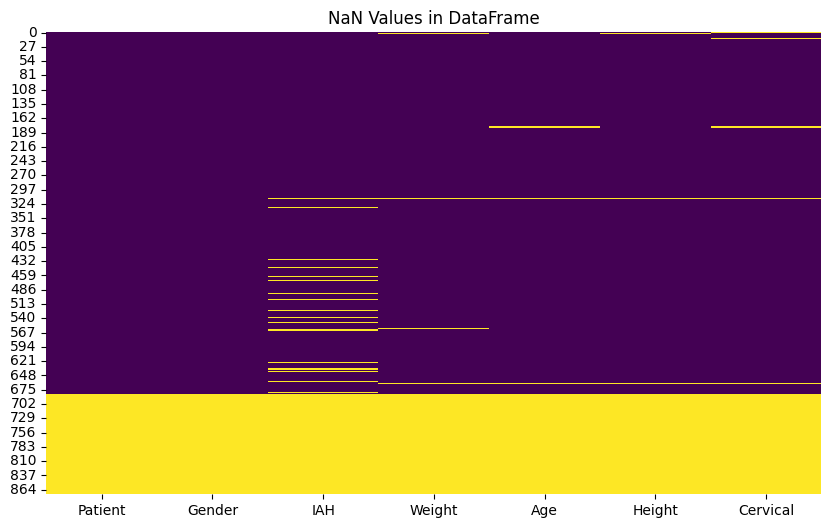

In [148]:
# Check for NaN values in the DataFrame
nan_values = df.isnull().sum()

# Display the columns with NaN values
print("Columns with NaN values:")
print(nan_values[nan_values > 0])

# Display the rows with NaN values
print("Rows with NaN values:")
print(df[df.isnull().any(axis=1)])

# Visualize NaN values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("NaN Values in DataFrame")
plt.show()

In [149]:
# Remove rows where all values are NaN
df = df.dropna(how='all')

# Remove rows for which IAH is NaN
df.dropna(subset=['IAH'], inplace=True)

In [150]:
# Means for columns containing NaNs
mean_values = df[['Weight', 'Age', 'Height', 'Cervical']].mean(skipna=True)
mean_values

Weight       87.683230
Age          49.428571
Height      171.314729
Cervical     40.649452
dtype: float64

In [151]:
# Replace NaN values with the means
df.fillna(mean_values, inplace=True)

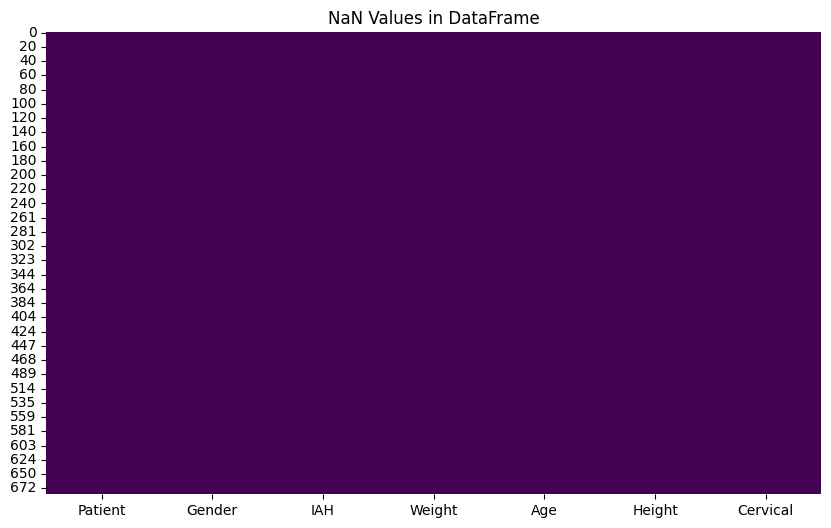

In [152]:
nan_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("NaN Values in DataFrame")
plt.show()


### Feature Engineering

In [153]:
# Calculate BMI and add it as a new column
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

As final step, let's save the newly created dataset to be able to use it in our project

In [154]:
output_filepath = "Clinical_data.xlsx"
df.to_excel(output_filepath, index=False)

### Normalization

Another additional step we can do is data normalization, to ensure that all quantities are on a similar scale for algorithms sensitive to feature scales. We will save the normalized dataset in a separate file.

In [155]:
from sklearn.preprocessing import MinMaxScaler

# Creating a copy of the dataset
norm_df = df.copy()

# Selecting the features to be normalized
features = ['Weight', 'Age', 'BMI', 'Cervical', 'Height']

# Normalizing the features
scaler = MinMaxScaler()
norm_df[features] = scaler.fit_transform(norm_df[features])

In [156]:
output_filepath = "Clinical_data_norm.xlsx"
norm_df.to_excel(output_filepath, index=False)

# Seperate data per gender

In [164]:
# Separate the dataset into males and females
male_df = df[df['Gender'] == 1]
female_df = df[df['Gender'] == 0]

# Remove the Gender column after separation
male_df = male_df.drop(columns=['Gender'])
female_df = female_df.drop(columns=['Gender'])

# Add OSA category based on IAH values: 0: No OSA, 1: OSA
male_df.loc[:, 'OSA'] = male_df['IAH'].apply(lambda x: 0 if x <= 10 else (1 if x >= 30 else None))
female_df.loc[:, 'OSA'] = female_df['IAH'].apply(lambda x: 0 if x <= 10 else (1 if x >= 30 else None))

# Remove rows with IAH values between 10 and 30
male_df = male_df.dropna(subset=['OSA'])
female_df = female_df.dropna(subset=['OSA'])

male_df.to_excel('datasets/male_data.xlsx', index=False)
female_df.to_excel('datasets/female_data.xlsx', index=False)

In [165]:
female_df.head()

,Patient,IAH,Weight,Age,Height,Cervical,BMI,OSA
13,P0014,7.0,50.0,50.0,158.0,35.0,20.028842,0.0
14,P0015,5.0,55.0,62.0,156.0,38.0,22.600263,0.0
17,P0018,10.0,90.0,60.0,158.0,39.0,36.051915,0.0
22,P0023,4.0,60.0,53.0,162.0,33.0,22.862369,0.0
27,P0028,5.9,74.0,53.0,155.0,38.0,30.801249,0.0


In [166]:
female_df.shape

(134, 8)

In [167]:
male_df.head()

,Patient,IAH,Weight,Age,Height,Cervical,BMI,OSA
0,P0001,71.0,82.00000,39.0,168.000000,40.649452,29.053288,1.0
2,P0003,56.0,87.68323,46.0,171.314729,43.000000,29.876322,1.0
4,P0005,9.0,80.00000,32.0,173.000000,40.000000,26.729927,0.0
5,P0006,2.0,109.00000,32.0,190.000000,42.000000,30.193906,0.0
6,P0007,34.0,86.00000,39.0,169.000000,42.000000,30.110991,1.0


In [168]:
male_df.shape

(285, 8)